In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC  [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC# [[J,i,(i+1)%L] for i in range(L)] # PBC
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def output_gauge_potent(Ham,L):
    E,V= Ham.eigh()
    V_mat=np.matrix(V)
    V_mat_H=V_mat.H
    op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    return wij, num_lamb_mat
  
def gauge_potent_mu(wij,num_lamb_mat,mu):
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb


In [3]:
L=8
hz=5.0
Ham=Ham_int_antiferro(L,hz)
wij_int, num_lamb_mat_int=output_gauge_potent(Ham,L)
Ham=Ham_nonint(L)
wij_nonint, num_lamb_mat_nonint=output_gauge_potent(Ham,L)

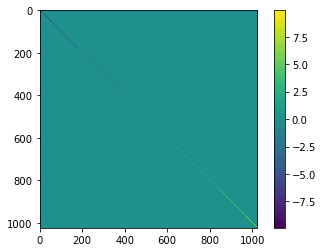

In [29]:
plt.imshow(num_lamb_mat_int)
plt.colorbar()

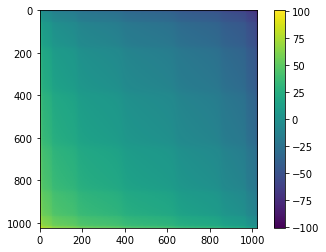

In [30]:
plt.imshow(wij_int)
plt.colorbar()

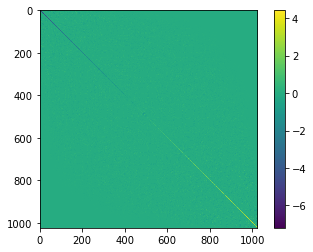

In [32]:
plt.imshow(num_lamb_mat_nonint)
plt.colorbar()

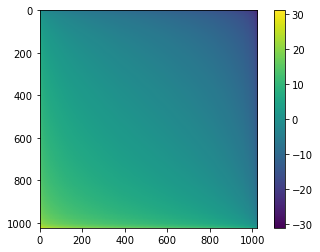

In [33]:
plt.imshow(wij_nonint)
plt.colorbar()

### Distribution

In [49]:
L=8
Ham=Ham_nonint(L)
wij_nonint, num_lamb_mat_nonint=output_gauge_potent(Ham,L)
index_lower = np.tril_indices(2**L,-1)
num_lamb_mat_nonint_arr=num_lamb_mat_nonint[index_lower]
num_lamb_mat_int_arr=num_lamb_mat_int[index_lower]

In [57]:
print num_lamb_mat_nonint.shape
print num_lamb_mat_nonint_arr.shape
print num_lamb_mat_nonint_arr.getA1()

(4, 4)
(1, 6)
[ -1.33913398e-16   3.17755325e-02   2.23770146e-16  -7.88372607e-01
   2.20525963e-16   1.02974960e+00]


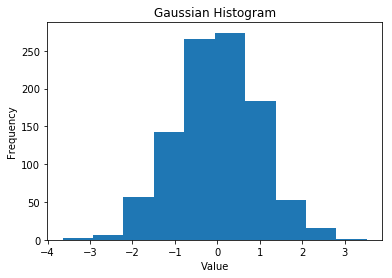

In [16]:
gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.savefig("normal_wo_s.eps", dpi=300)

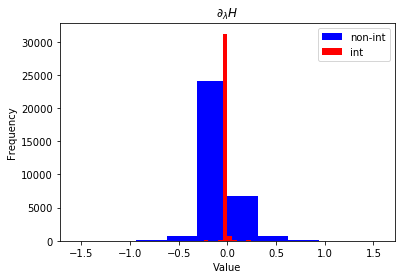

In [15]:
count, bins, ignored =plt.hist(num_lamb_mat_nonint_arr.getA1(), color='b',normed=False,histtype='bar', label='non-int')
plt.hist(num_lamb_mat_int_arr.getA1(), color='r',normed=False,histtype='bar', label='int')
plt.xlabel("Value")
plt.title(r"$\partial_{\lambda}H$")
plt.ylabel("Frequency")
plt.legend()

In [51]:
wij_nonint_arr=wij_nonint[index_lower]
#wij_int_arr=wij_int[index_lower]

This is better in finding bin size of histrograms 
+ http://docs.astropy.org/en/stable/visualization/histogram.html 
+ http://www.astroml.org/modules/generated/astroML.plotting.hist.html#astroML.plotting.hist 
+ http://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/

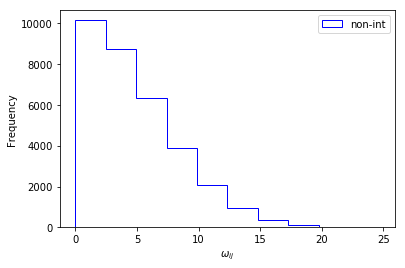

In [52]:
count, bins, ignored =plt.hist(wij_nonint_arr, color='b',normed=False,histtype='step', label='non-int')
#plt.hist(wij_int_arr, color='r',normed=False,histtype='step', label='int')
plt.ylabel("Frequency")
plt.xlabel("$\omega_{ij}$")
plt.legend()

In [6]:
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

(array([   2.,    1.,    7.,   11.,    9.,   21.,   17.,   37.,   54.,
          50.,  103.,   82.,   84.,   92.,   91.,   83.,   71.,   63.,
          42.,   43.,   15.,    8.,    9.,    2.,    3.]),
 array([-3.13165804, -2.88922951, -2.64680099, -2.40437247, -2.16194394,
        -1.91951542, -1.6770869 , -1.43465837, -1.19222985, -0.94980133,
        -0.7073728 , -0.46494428, -0.22251575,  0.01991277,  0.26234129,
         0.50476982,  0.74719834,  0.98962686,  1.23205539,  1.47448391,
         1.71691243,  1.95934096,  2.20176948,  2.444198  ,  2.68662653,
         2.92905505]),
 <a list of 25 Patch objects>)

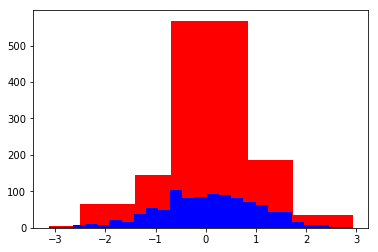

In [8]:
from astroML.plotting import hist
x = np.random.normal(size=1000)
hist(x, bins='blocks', color='r')
hist(x, bins='knuth', color='b')

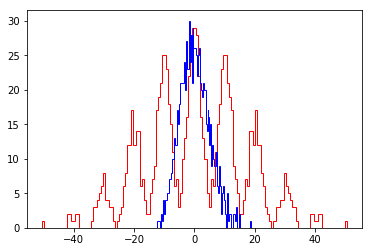

In [11]:
count, bins, ignored=plt.hist(E_int, bins=150, color='r', normed=False,histtype='step')
count, bins, ignored=plt.hist(E_nonint, bins=100, color='b',normed=False,histtype='step')

### ETH: $<E_n|\partial_{\lambda}H|E_n>$

In [4]:
def diagonal_average_operator(Ham,L):
    E,V= Ham.eigh()
    V_mat=np.matrix(V)
    V_mat_H=V_mat.H
    op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    return E, num_lamb_mat
L=10
hz=5.0
H_nonint=Ham_nonint(L)
H_int=Ham_int_antiferro(L,hz)
E_nonint, num_lamb_mat_nonint=diagonal_average_operator(H_nonint,L)
E_int, num_lamb_mat_int=diagonal_average_operator(H_int,L)
average_op_nonint=np.diagonal(num_lamb_mat_nonint)
average_op_int=np.diagonal(num_lamb_mat_int)

In [5]:
L=8
hz=5.0
H_nonint=Ham_nonint(L)
H_int=Ham_int_antiferro(L,hz)
E_nonint_L8, num_lamb_mat_nonint=diagonal_average_operator(H_nonint,L)
E_int_L8, num_lamb_mat_int=diagonal_average_operator(H_int,L)
average_op_nonint_L8=np.diagonal(num_lamb_mat_nonint)
average_op_int_L8=np.diagonal(num_lamb_mat_int)

In [28]:
print num_lamb_mat_nonint
print np.diagonal(num_lamb_mat_nonint)


[[ -1.75338933e+00  -1.56699515e-16   3.17755325e-02  -7.88372607e-01]
 [ -1.33913398e-16   4.93038066e-32   2.77880993e-16   2.14811960e-16]
 [  3.17755325e-02   2.23770146e-16   7.70420912e-01   1.02974960e+00]
 [ -7.88372607e-01   2.20525963e-16   1.02974960e+00   9.82968415e-01]]
[ -1.75338933e+00   4.93038066e-32   7.70420912e-01   9.82968415e-01]


In [29]:
print E_nonint

[-2.30336868 -1.          0.2340237   3.06934498]


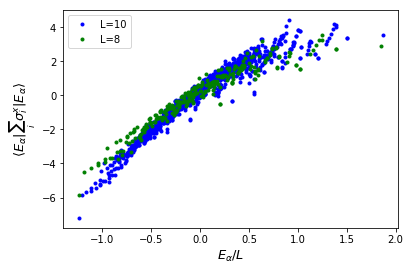

In [7]:
plt.plot(E_nonint/10.0, average_op_nonint, 'b.', label='L=10')
plt.plot(E_nonint_L8/8.0, average_op_nonint_L8, 'g.'label='L=10')
plt.ylabel(r"$\langle E_{\alpha} |\sum_i \sigma_i^x| E_{\alpha} \rangle$", fontsize=13)
plt.xlabel(r"$ E_{\alpha}/L $", fontsize=13)
plt.legend()

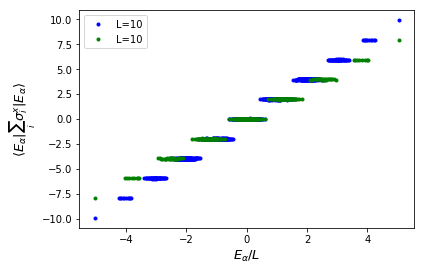

In [10]:
plt.plot(E_int/10.0, average_op_int, 'b.',label='L=10')
plt.plot(E_int_L8/8.0, average_op_int_L8, 'g.',label='L=10')
plt.ylabel(r"$\langle E_{\alpha} |\sum_i \sigma_i^x| E_{\alpha} \rangle$", fontsize=13)
plt.xlabel(r"$ E_{\alpha}/L $", fontsize=13)
plt.legend()

In [28]:
# density of states
a = np.array([230, 10, 284, 39, 76])
x=np.where((a >= 10) & (a <=100))
print x
print x[0].size

(array([1, 3, 4]),)
3


In [38]:
print E_nonint[(E_nonint >= -0.25) & (E_nonint <=0.25)]
E_inside_window=E_nonint[(E_nonint >= -0.25) & (E_nonint <=0.25)]
index_E_inside_window=np.where((E_nonint >= -0.25) & (E_nonint <=0.25))
print E_inside_window.size

[-0.23794158 -0.21955751 -0.21475381 -0.21284519 -0.19596984 -0.1890924
 -0.17401289 -0.15998374 -0.15346448 -0.14136121 -0.12078213 -0.11992055
 -0.08159365 -0.07980432 -0.06835497 -0.06102915 -0.05533613 -0.04797752
 -0.03063459 -0.02678482  0.00199299  0.01023877  0.02056649  0.03266765
  0.05156756  0.05884931  0.06383633  0.08099701  0.09397099  0.10818725
  0.11547805  0.12061069  0.1594539   0.16410787  0.17573469  0.19709107
  0.21086927  0.21716463  0.22494198  0.24821874  0.24832075]
41


In [46]:
print E_nonint[index_E_inside_window]

[-0.23794158 -0.21955751 -0.21475381 -0.21284519 -0.19596984 -0.1890924
 -0.17401289 -0.15998374 -0.15346448 -0.14136121 -0.12078213 -0.11992055
 -0.08159365 -0.07980432 -0.06835497 -0.06102915 -0.05533613 -0.04797752
 -0.03063459 -0.02678482  0.00199299  0.01023877  0.02056649  0.03266765
  0.05156756  0.05884931  0.06383633  0.08099701  0.09397099  0.10818725
  0.11547805  0.12061069  0.1594539   0.16410787  0.17573469  0.19709107
  0.21086927  0.21716463  0.22494198  0.24821874  0.24832075]


In [47]:
print V_nonint[:,index_E_inside_window]

NameError: name 'V_nonint' is not defined